# Customer_churn_prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv(r'D:\Churn_Modelling.csv')

# Drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [3]:
# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [5]:
# Predictions
y_pred_lr = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

Logistic Regression:


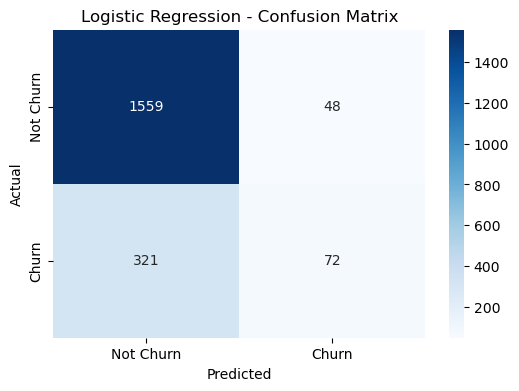

Random Forest:


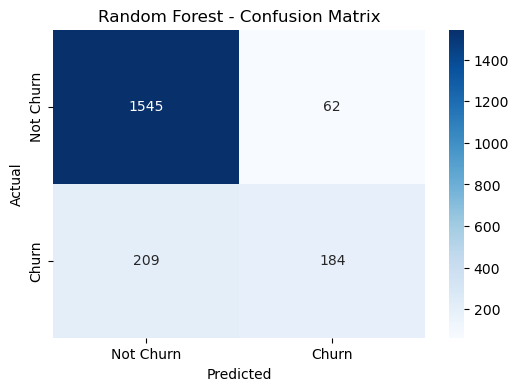

Gradient Boosting:


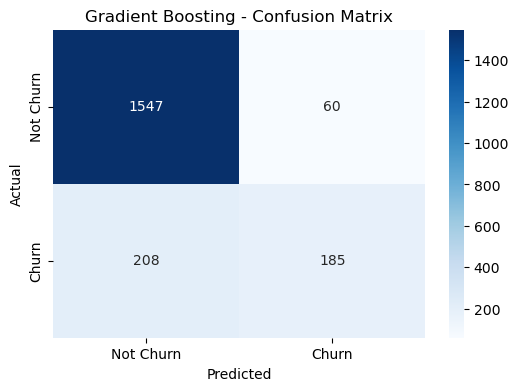

In [6]:
# Visualize Confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print("Logistic Regression:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression - Confusion Matrix")

print("Random Forest:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest - Confusion Matrix")

print("Gradient Boosting:")
cm_gb = confusion_matrix(y_test, y_pred_gb)
plot_confusion_matrix(cm_gb, "Gradient Boosting - Confusion Matrix")


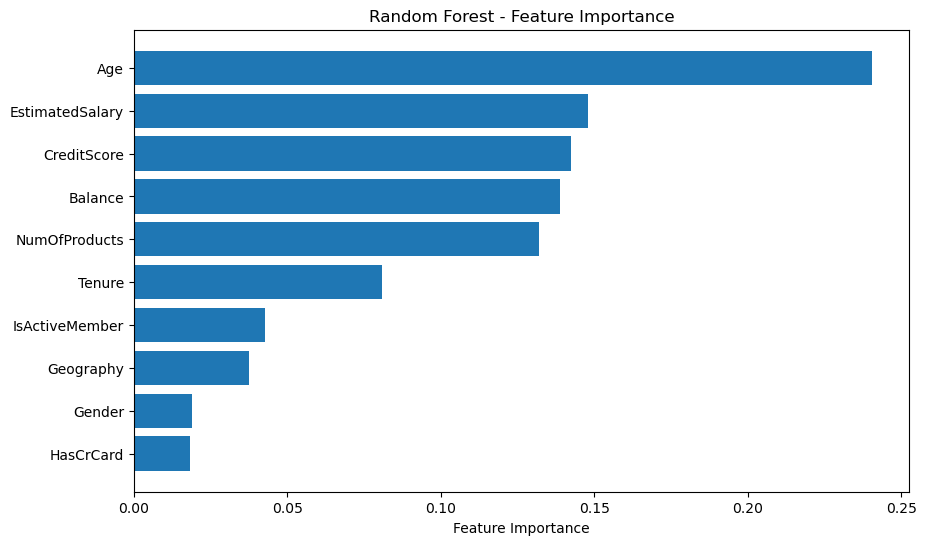

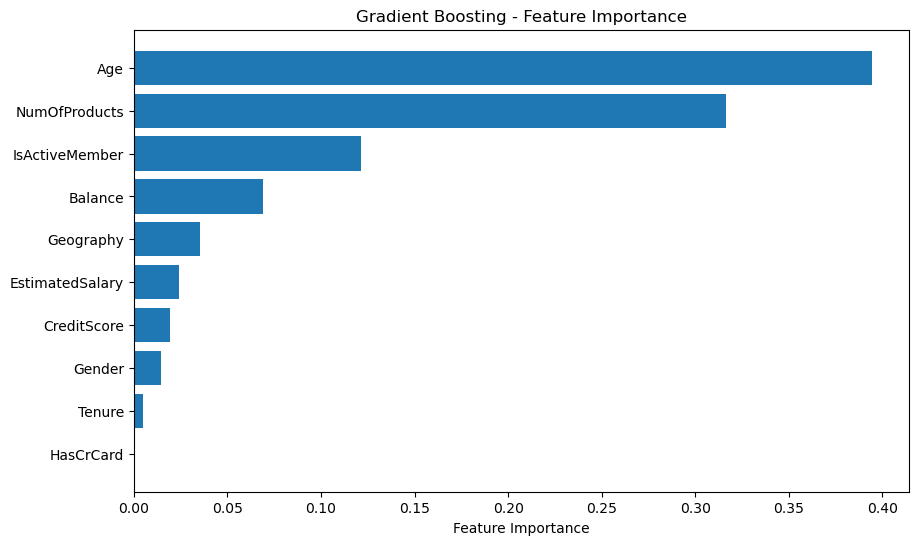

In [7]:
# Visualize Feature Importance for Random Forest and Gradient Boosting
def plot_feature_importance(model, title):
    importance = model.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(importance)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.show()

plot_feature_importance(random_forest_model, "Random Forest - Feature Importance")
plot_feature_importance(gradient_boosting_model, "Gradient Boosting - Feature Importance")


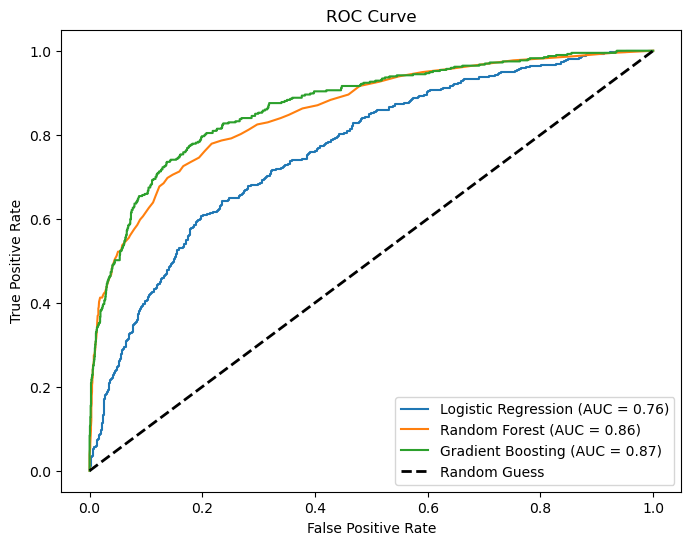

In [8]:
# Plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(logistic_model, X_test, y_test, "Logistic Regression")
plot_roc_curve(random_forest_model, X_test, y_test, "Random Forest")
plot_roc_curve(gradient_boosting_model, X_test, y_test, "Gradient Boosting")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()